Shape of inputs =  (784, 1000)
Shape of labels =  (10, 1000)
One-hot encoded label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Final Loss =  0.10633167374741996
Final Accuracy =  0.903
Final Test Loss = 0.1751305743637872
Final Test Accuracy = 0.792


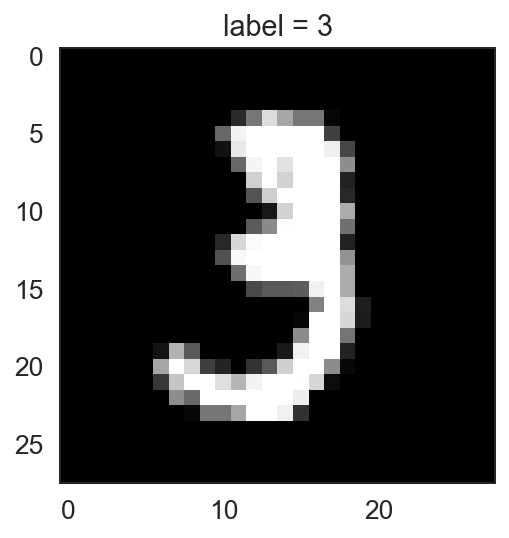

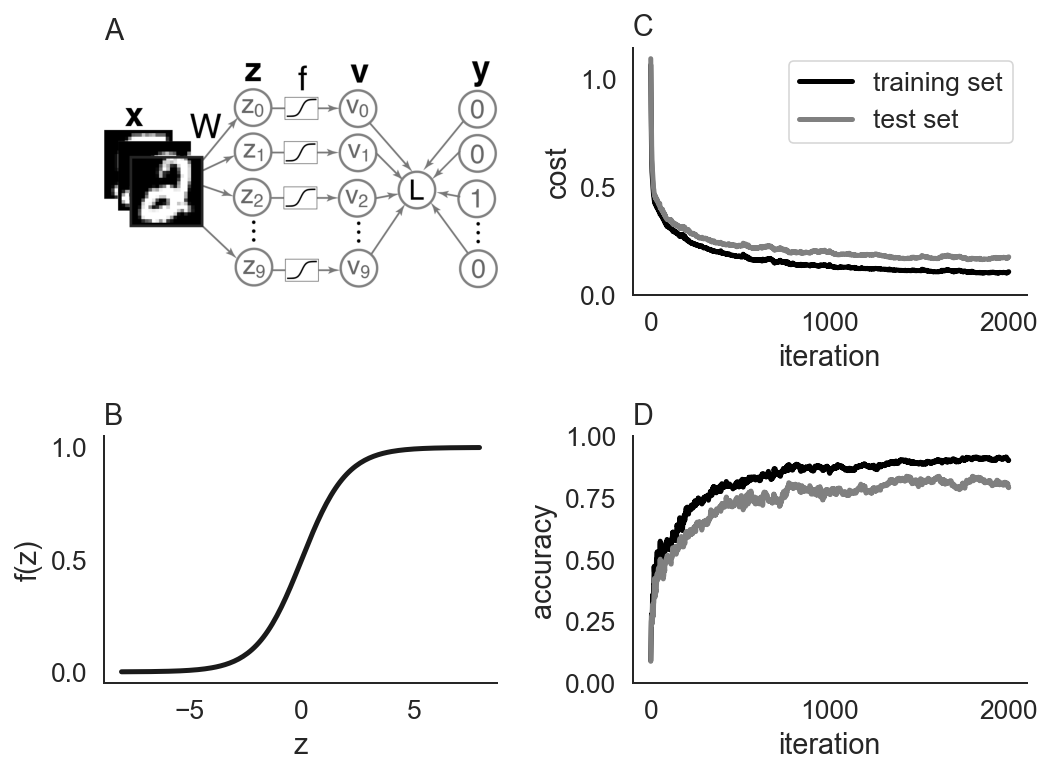

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)

# Learning rate
epsilon=.01


# Load the data from a file
# Load the data from a file
try: 
    data = np.load('./DataFiles/MNISTdata.npz', allow_pickle=True)
except:
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/DataFiles/MNISTdata.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)

X=data['X']
Y=data['Y']
XTest=data['XTest']
YTest=data['YTest']

# Pre-process data. This is not necessary, 
# but it can improve learning. 
X=(X-X.mean())/X.std()
XTest=(XTest-XTest.mean())/XTest.std()


print('Shape of inputs = ',X.shape)
print('Shape of labels = ',Y.shape)

# Display an image from the data set
i=10
plt.figure()
plt.imshow(X[:,i].reshape(28,28),cmap='gray')  
plt.title('label = %d'%np.argmax(Y[:,i]))
print('One-hot encoded label:',Y[:,i])


# Initialize W
W=np.random.randn(10,28*28)/np.sqrt(28*28*10)


# Import logistic sigmoid activation function
from scipy.special import expit as LogisticSigmoid

def f(x):
    return LogisticSigmoid(x)

# Derivative of logistic sigmoid
def fprime(x):
    return f(x)*(1-f(x))


# Get the size of the data set
m=np.shape(X)[1]
NumEpochs=2
NumIterations=NumEpochs*m

# Initialize vectors of losses and accuracies
TrainLoss=np.zeros(NumIterations)
TrainAccuracy=np.zeros(NumIterations)
TestLoss=np.zeros(NumIterations)
TestAccuracy=np.zeros(NumIterations)


# Get the actua digits from the one-hot encoded labels
ActualDigits=np.argmax(Y,axis=0)
TestActualDigits=np.argmax(YTest,axis=0)



for k in range(NumEpochs):
    for i in range(m):        
        z=W@X[:,i] 
        v=f(z)     
        DeltaW=-epsilon*np.outer((v-Y[:,i])*fprime(z),X[:,i])
        W=W+DeltaW 

        # Compute percent correct on entire training set
        # using current value of W
        V=f(W@X)
        TrainLoss[i+m*k]=(1/2)*np.mean(np.sum((V-Y)**2,axis=0))    
        TrainGuesses=np.argmax(V,axis=0)
        TrainCorrect=(TrainGuesses==ActualDigits)
        TrainAccuracy[i+m*k]=np.mean(TrainCorrect)

        # Now do test set
        VTest=f(W@XTest)
        TestLoss[i+m*k]=(1/2)*np.mean(np.sum((VTest-YTest)**2,axis=0))    
        TestGuesses=np.argmax(VTest,axis=0)
        TestCorrect=(TestGuesses==TestActualDigits)
        TestAccuracy[i+m*k]=np.mean(TestCorrect)

    
print('Final Loss = ',TrainLoss[-1])
print('Final Accuracy = ',TrainAccuracy[-1])
print('Final Test Loss =',TestLoss[-1])
print('Final Test Accuracy =',TestAccuracy[-1])    
    

# Make figure
plt.subplots(2,2,figsize=(9*.85,6.6*.85))

plt.subplot(2,2,1)
# Get image for plot
# Get image for plot
try: 
    im = plt.imread('./ImageFiles/ANNDiagram.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/CodeFromBook/ImageFiles/ANNDiagram.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('A',loc='left')
sns.despine()

plt.subplot(2,2,3)
zplot=np.arange(-8,8,.1)
plt.plot(zplot,f(zplot),'k')
plt.ylabel('f(z)')
plt.xlabel('z')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,2,2)
plt.plot(TrainLoss,color='black',label='training set')
plt.plot(TestLoss,color='gray',label='test set')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.ylim(bottom=0)
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,2,4)
plt.plot(TrainAccuracy,color='black')
plt.plot(TestAccuracy,color='gray')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.title('D',loc='left')
sns.despine()

plt.tight_layout()

